In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Reading the data
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data.shape

(271116, 15)

In [ ]:
# Finding the number of olympics for which data is available
len(data.groupby(['Year','Season']).size().to_frame().index)

51

In [ ]:
# Handling missing data
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
# NaN in medal indicates nothing. Replace it with string None
data['Medal'] = data['Medal'].fillna('None')

In [ ]:
# For missing height, weight and age: First check if there is a different entry in the future for the same athlete
#                                     and take the values from there
# For missing height and weight : Fill with average of height and weight of that age
# For missing age : Fill with avg(avg age for that height, avg age for that weight)

In [ ]:
# Number of athletes for which age is missing
len(data[data['Age'].isna()].groupby(['ID']).size().to_frame().index)

6368

In [ ]:
# Number of athletes for whom height is missing
len(data[data['Height'].isna()].groupby(['ID']).size().to_frame().index)

33916

In [ ]:
# Number of athletes for whom weight is missing
len(data[data['Weight'].isna()].groupby(['ID']).size().to_frame().index)

34885

In [ ]:
# Number of athletes for whom all three values are missing
len(data[(data['Age'].isna()) & (data['Height'].isna()) & (data['Weight'].isna()) ].groupby(['ID']).size().to_frame().index)


5581

In [ ]:
# For athletes with age missing, is there a second occurance where age is not missing?
athletes_missing_age = data[data['Age'].isna()].groupby(['ID']).size().to_frame().index

In [ ]:
count = 0
i = 0
for athlete in athletes_missing_age:
    i+=1
    if len(data[(data['ID']==athlete) & (data['Age'].notna())])!=0:
        print(athlete)
        break

In [ ]:
print(i)
# No

6368


In [ ]:
# For athletes with height missing, is there a second occurance where height is not missing?
athletes_missing_height = data[data['Height'].isna()].groupby(['ID']).size().to_frame().index
count = 0
i = 0
for athlete in athletes_missing_height:
    i+=1
    if len(data[(data['ID']==athlete) & (data['Height'].notna())])!=0:
        print(athlete)
        break

In [ ]:
i
# No

33916

In [ ]:
# For athletes with weight missing, is there a second occurance where weight is not missing?
athletes_missing_weight = data[data['Weight'].isna()].groupby(['ID']).size().to_frame().index
count = 0
i = 0
for athlete in athletes_missing_weight:
    i+=1
    if len(data[(data['ID']==athlete) & (data['Weight'].notna())])!=0:
        print(athlete)
        break

In [ ]:
i
#No

34885

In [ ]:
# There are no second occurences for missing data
# Let us check data completeness for the years 
from plotnine import *
chart_data_age = data.groupby(['Year','Sex'],as_index=False).agg(Total=('Age','size'), Present= ('Age','count'))
chart_data_age.head()

,Year,Sex,Total,Present
0,1896,M,380,217
1,1900,F,33,24
2,1900,M,1903,1122
3,1904,F,16,13
4,1904,M,1285,1014


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


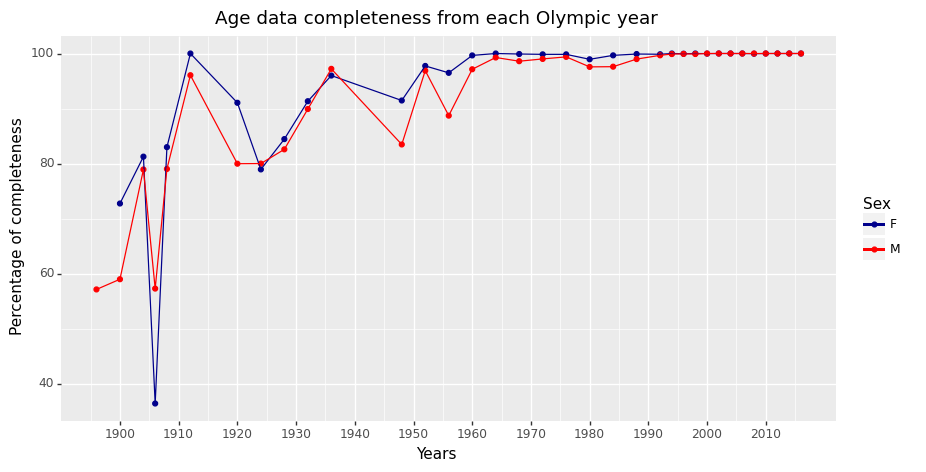

<ggplot: (8776063425377)>

In [ ]:
(ggplot(chart_data_age,aes(x='Year', y='Present*100/Total', group='Sex', color='Sex'))) + \
  geom_point() + \
  geom_line() + \
  scale_color_manual(values=["darkblue","red"])  + \
  scale_x_continuous(breaks=range(1900,chart_data_age['Year'].max(),10)) + \
  labs(title="Age data completeness from each Olympic year") + \
  theme(figure_size=(10, 5)) + \
  xlab('Years') + \
  ylab('Percentage of completeness')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


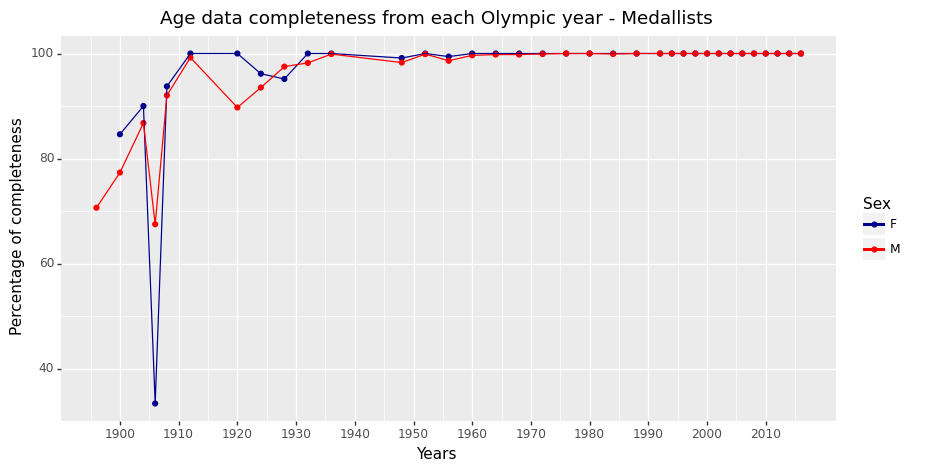

<ggplot: (8776061458037)>

In [ ]:
# Checking age for medallists
chart_data_age = data[data['Medal']!='None'].groupby(['Year','Sex'],as_index=False).agg(Total=('Age','size'), Present= ('Age','count'))
(ggplot(chart_data_age,aes(x='Year', y='Present*100/Total', group='Sex', color='Sex'))) + \
  geom_point() + \
  geom_line() + \
  scale_color_manual(values=["darkblue","red"])  + \
  scale_x_continuous(breaks=range(1900,chart_data_age['Year'].max(),10)) + \
  labs(title="Age data completeness from each Olympic year - Medallists") + \
  theme(figure_size=(10, 5)) + \
  xlab('Years') + \
  ylab('Percentage of completeness')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


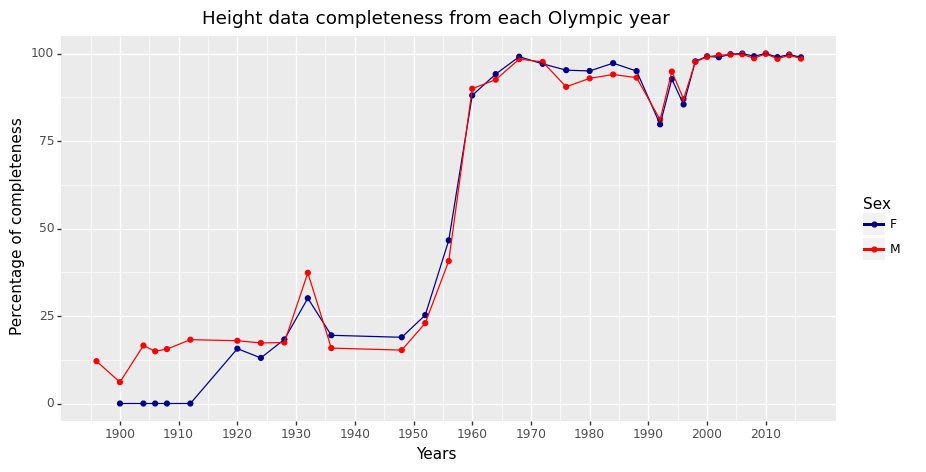

<ggplot: (8776061461473)>

In [ ]:
chart_data_height = data.groupby(['Year','Sex'],as_index=False).agg(Total=('Height','size'), Present= ('Height','count'))
(ggplot(chart_data_height,aes(x='Year', y='Present*100/Total', group='Sex', color='Sex'))) + \
  geom_point() + \
  geom_line() + \
  scale_color_manual(values=["darkblue","red"])  + \
  scale_x_continuous(breaks=range(1900,chart_data_height['Year'].max(),10)) + \
  labs(title="Height data completeness from each Olympic year") + \
  theme(figure_size=(10, 5)) + \
  xlab('Years') + \
  ylab('Percentage of completeness')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


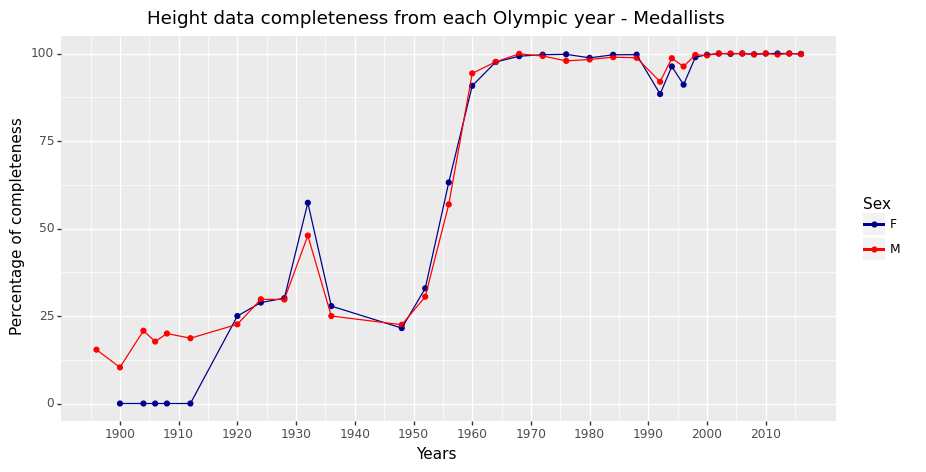

<ggplot: (8776099580205)>

In [ ]:
# Checking for Medallists
chart_data_height = data[data['Medal']!='None'].groupby(['Year','Sex'],as_index=False).agg(Total=('Height','size'), Present= ('Height','count'))
(ggplot(chart_data_height,aes(x='Year', y='Present*100/Total', group='Sex', color='Sex'))) + \
  geom_point() + \
  geom_line() + \
  scale_color_manual(values=["darkblue","red"])  + \
  scale_x_continuous(breaks=range(1900,chart_data_height['Year'].max(),10)) + \
  labs(title="Height data completeness from each Olympic year - Medallists") + \
  theme(figure_size=(10, 5)) + \
  xlab('Years') + \
  ylab('Percentage of completeness')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


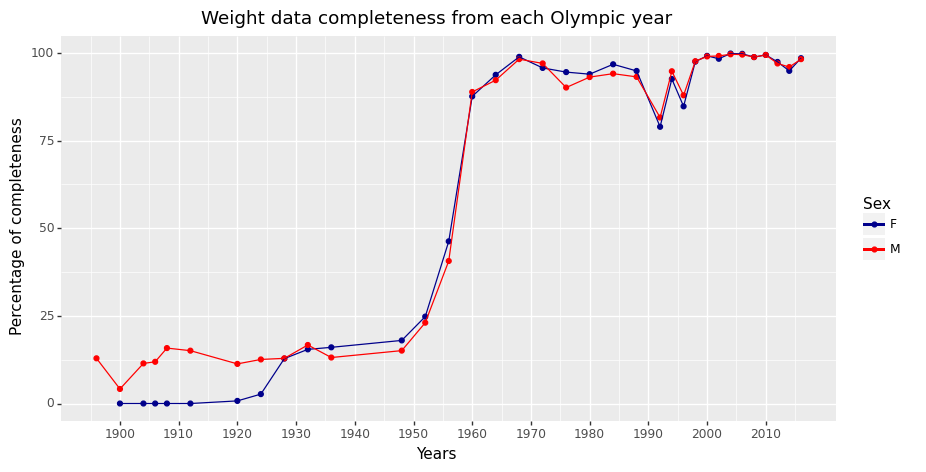

<ggplot: (8776061345725)>

In [ ]:
chart_data_weight = data.groupby(['Year','Sex'],as_index=False).agg(Total=('Weight','size'), Present= ('Weight','count'))
(ggplot(chart_data_weight,aes(x='Year', y='Present*100/Total', group='Sex', color='Sex'))) + \
  geom_point() + \
  geom_line() + \
  scale_color_manual(values=["darkblue","red"])  + \
  scale_x_continuous(breaks=range(1900,chart_data_weight['Year'].max(),10)) + \
  labs(title="Weight data completeness from each Olympic year") + \
  theme(figure_size=(10, 5)) + \
  xlab('Years') + \
  ylab('Percentage of completeness')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


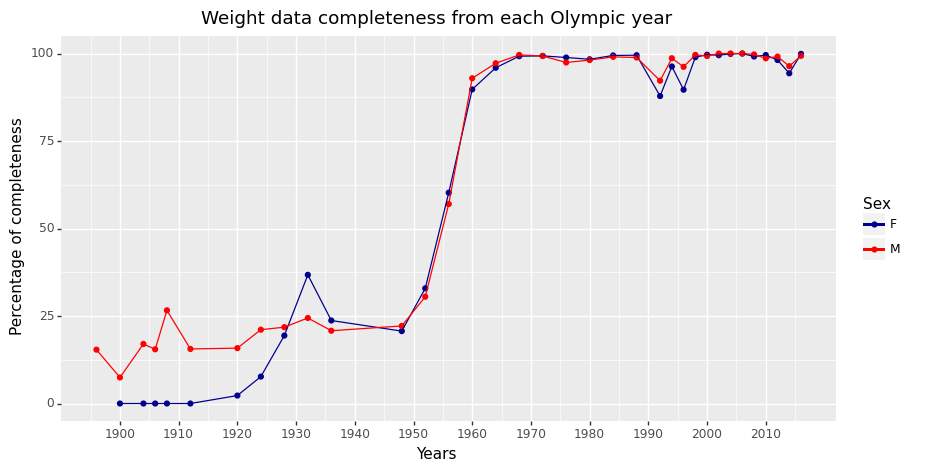

<ggplot: (8776063043721)>

In [ ]:
# Checking for Medallists
chart_data_weight = data[data['Medal']!='None'].groupby(['Year','Sex'],as_index=False).agg(Total=('Weight','size'), Present= ('Weight','count'))
(ggplot(chart_data_weight,aes(x='Year', y='Present*100/Total', group='Sex', color='Sex'))) + \
  geom_point() + \
  geom_line() + \
  scale_color_manual(values=["darkblue","red"])  + \
  scale_x_continuous(breaks=range(1900,chart_data_weight['Year'].max(),10)) + \
  labs(title="Weight data completeness from each Olympic year") + \
  theme(figure_size=(10, 5)) + \
  xlab('Years') + \
  ylab('Percentage of completeness')

In [ ]:
# INFERENCE:
# Data mostly present after 1960 - especially age
# From 1990 to 2000 there has been some drop in the height and weight data completeness
#                    in the years of olympics in between

# Data completeness better for medallists than the remaining participants

In [ ]:
# Solution for missing data

# Missing data is for thousands of athletes. Although we don't have the means to get a proper estimate 
#         for the missing data, we cannot delete them as this will affect the participant count.

# Fill in the missing values with the average of the participants of the same sport that year so as to maintain
#                            the distribution of the values

In [ ]:
# Filling in missing values

In [ ]:
# Age
data['Age'] = data.apply(lambda row: \
                           data[(data['Year'] == row['Year']) & (data['Season']==row['Season']) & \
                                       (data['Sex'] == row['Sex']) & (data['Event']==row['Event'])]['Age'].mean()  \
                           if np.isnan(row['Age']) else row['Age'],axis=1)

In [ ]:
# Height
data['Height'] = data.apply(lambda row: \
                           data[(data['Year'] == row['Year']) & (data['Season']==row['Season']) & \
                                       (data['Sex'] == row['Sex']) & (data['Event']==row['Event'])]['Height'].mean()  \
                           if np.isnan(row['Height']) else row['Height'],axis=1)


In [ ]:
# Weight
data['Weight'] = data.apply(lambda row: \
                           data[(data['Year'] == row['Year']) & (data['Season']==row['Season']) & \
                                       (data['Sex'] == row['Sex']) & (data['Event']==row['Event'])]['Weight'].mean()  \
                           if np.isnan(row['Weight']) else row['Weight'],axis=1)


In [ ]:
# The number of missing values now is significantly lower and for these, we cannot make any relevant estimates 
# So for analysis involving the age, height and weight for these, we shall drop these rows

In [ ]:
data['Age'].isna().sum()

149

In [ ]:
data['Height'].isna().sum()

6117

In [ ]:
data['Weight'].isna().sum()

12863

In [ ]:
data.to_csv('cleaned.csv')